In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv("C:/Users/suraj/Desktop/ExcelR/Assignment 4 simple linear regression/Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.shape

(30, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.duplicated().sum()

0

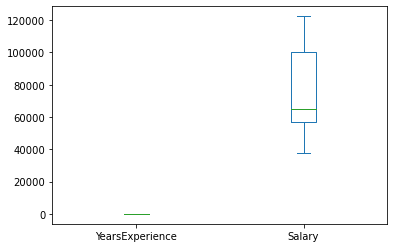

In [7]:
data.plot(kind="box")
plt.show()

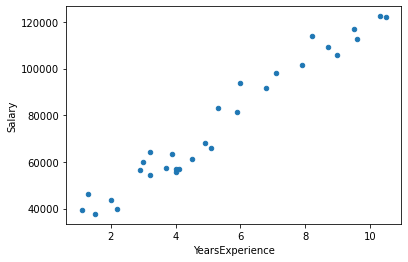

In [8]:
data.plot(kind="scatter" , x="YearsExperience" , y="Salary" )
plt.show()

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

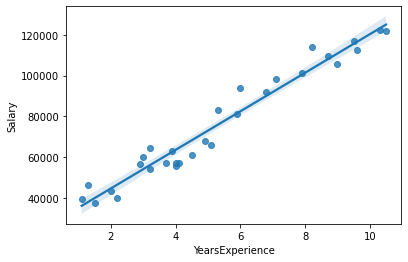

In [10]:
import seaborn as sns
sns.regplot(x="YearsExperience" , y="Salary" , data=data)

In [11]:
#original model
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [12]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
print(model.tvalues,"\n",model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [14]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Sqrt transformation

In [15]:
#Applying sqrt transformation
x_sq = np.sqrt(data['YearsExperience']).values.reshape(-1,1)
y_sq = data['Salary'].values.reshape(-1,1)

In [16]:
model_sq=smf.ols('y_sq~x_sq',data=data).fit()

In [17]:
print(model_sq.tvalues, '\n', model_sq.pvalues) 

Intercept    -3.262308
x_sq         19.437148
dtype: float64 
 Intercept    2.906965e-03
x_sq         8.565358e-18
dtype: float64


In [18]:
(model_sq.rsquared,model_sq.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

# Log transformation

In [19]:
#Applying log transformation
x_log = np.log(data['YearsExperience']).values.reshape(-1,1)
y_log = data['Salary'].values.reshape(-1,1)

In [20]:
model_log=smf.ols('y_log~x_log',data=data).fit()

In [21]:
print(model_log.tvalues, '\n', model_log.pvalues)  

Intercept     2.895135
x_log        12.791989
dtype: float64 
 Intercept    7.268813e-03
x_log        3.250155e-13
dtype: float64


In [22]:
(model_log.rsquared,model_log.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

# exponential transofrmation

In [31]:
x_exp = data['YearsExperience'].values.reshape(-1,1)
y_exp = np.log(data['Salary']).values.reshape(-1,1)

In [46]:
model_exp=smf.ols('y_exp~x_exp',data=data).fit()

In [49]:
print(model_exp.tvalues, '\n', model_exp.pvalues)  

Intercept    273.327166
x_exp         19.584833
dtype: float64 
 Intercept    1.604634e-49
x_exp        7.027439e-18
dtype: float64


In [50]:
(model_exp.rsquared,model_exp.rsquared_adj)

(0.9319671194084194, 0.9295373736730057)

# reciprocal transformation

In [37]:
x_resp = data['YearsExperience'].values.reshape(-1,1)
y_resp = 1/((data['Salary']).values.reshape(-1,1))

In [43]:
model_resp=smf.ols('y_resp~x_resp',data=data).fit()

In [52]:
print(model_resp.tvalues, '\n', model_resp.pvalues)  

Intercept    29.913113
x_resp      -13.162319
dtype: float64 
 Intercept    8.500940e-23
x_resp       1.631985e-13
dtype: float64


In [53]:
(model_resp.rsquared,model_resp.rsquared_adj)

(0.8608672473082565, 0.8558982204264085)

# predictions

In [23]:
#Prediction
new_data=pd.Series([2.2,3,4])
new_data

0    2.2
1    3.0
2    4.0
dtype: float64

In [24]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2.2
1,3.0
2,4.0


In [25]:
model.predict(data_pred)

0    46582.117306
1    54142.087163
2    63592.049484
dtype: float64